In [1]:
import os
import pandas as pd

# Define the input directory for labeled files and output file for storing data
labeled_dir = r'/home/prio/loc_project/Mini_2_ERC_721/labelling_out'
output_file = r'/home/prio/loc_project/Mini_2_ERC_721/transactions(edges)_day.csv'

# Initialize a list to store the number of transactions for each day
num_transactions_per_day = []

print("Number of transactions on")

# Process each CSV file in the labeled directory
total_files = len([f for f in os.listdir(labeled_dir) if f.endswith('.csv')])
for i, filename in enumerate(sorted(os.listdir(labeled_dir)), start=1):
    if filename.endswith('.csv'):
        file_path = os.path.join(labeled_dir, filename)
        
        # Read the CSV file
        df = pd.read_csv(file_path)
        
        # Count the number of transactions (rows) in the current file
        num_transactions = len(df)
        day_name = filename.replace('.csv', '')
        num_transactions_per_day.append((day_name, num_transactions))
        
        # Print the number of transactions for the current day
        print(f"{day_name}: {num_transactions}")
        
        # Print the progress
        print(f"Progress: {i}/{total_files} files processed")

# Sort the number of transactions by day name
num_transactions_per_day.sort()

# Save the data to a CSV file
transactions_df = pd.DataFrame(num_transactions_per_day, columns=['Day', 'Number of Transactions'])
transactions_df.to_csv(output_file, index=False)
print(f"Data saved to {output_file}")


Number of transactions on
2015-10-27: 8
Progress: 1/2547 files processed
2016-02-01: 2
Progress: 2/2547 files processed
2016-02-04: 12
Progress: 3/2547 files processed
2016-02-09: 15
Progress: 4/2547 files processed
2016-02-11: 14
Progress: 5/2547 files processed
2016-02-12: 2
Progress: 6/2547 files processed
2016-02-13: 2
Progress: 7/2547 files processed
2016-02-14: 6
Progress: 8/2547 files processed
2016-02-15: 19
Progress: 9/2547 files processed
2016-02-16: 7
Progress: 10/2547 files processed
2016-02-17: 5
Progress: 11/2547 files processed
2016-02-18: 28
Progress: 12/2547 files processed
2016-02-19: 4
Progress: 13/2547 files processed
2016-02-20: 33
Progress: 14/2547 files processed
2016-02-21: 15
Progress: 15/2547 files processed
2016-02-22: 5
Progress: 16/2547 files processed
2016-02-23: 3
Progress: 17/2547 files processed
2016-02-25: 5
Progress: 18/2547 files processed
2016-02-26: 8
Progress: 19/2547 files processed
2016-02-27: 6
Progress: 20/2547 files processed
2016-02-28: 5
Pr

# Normal Edges Daywise 

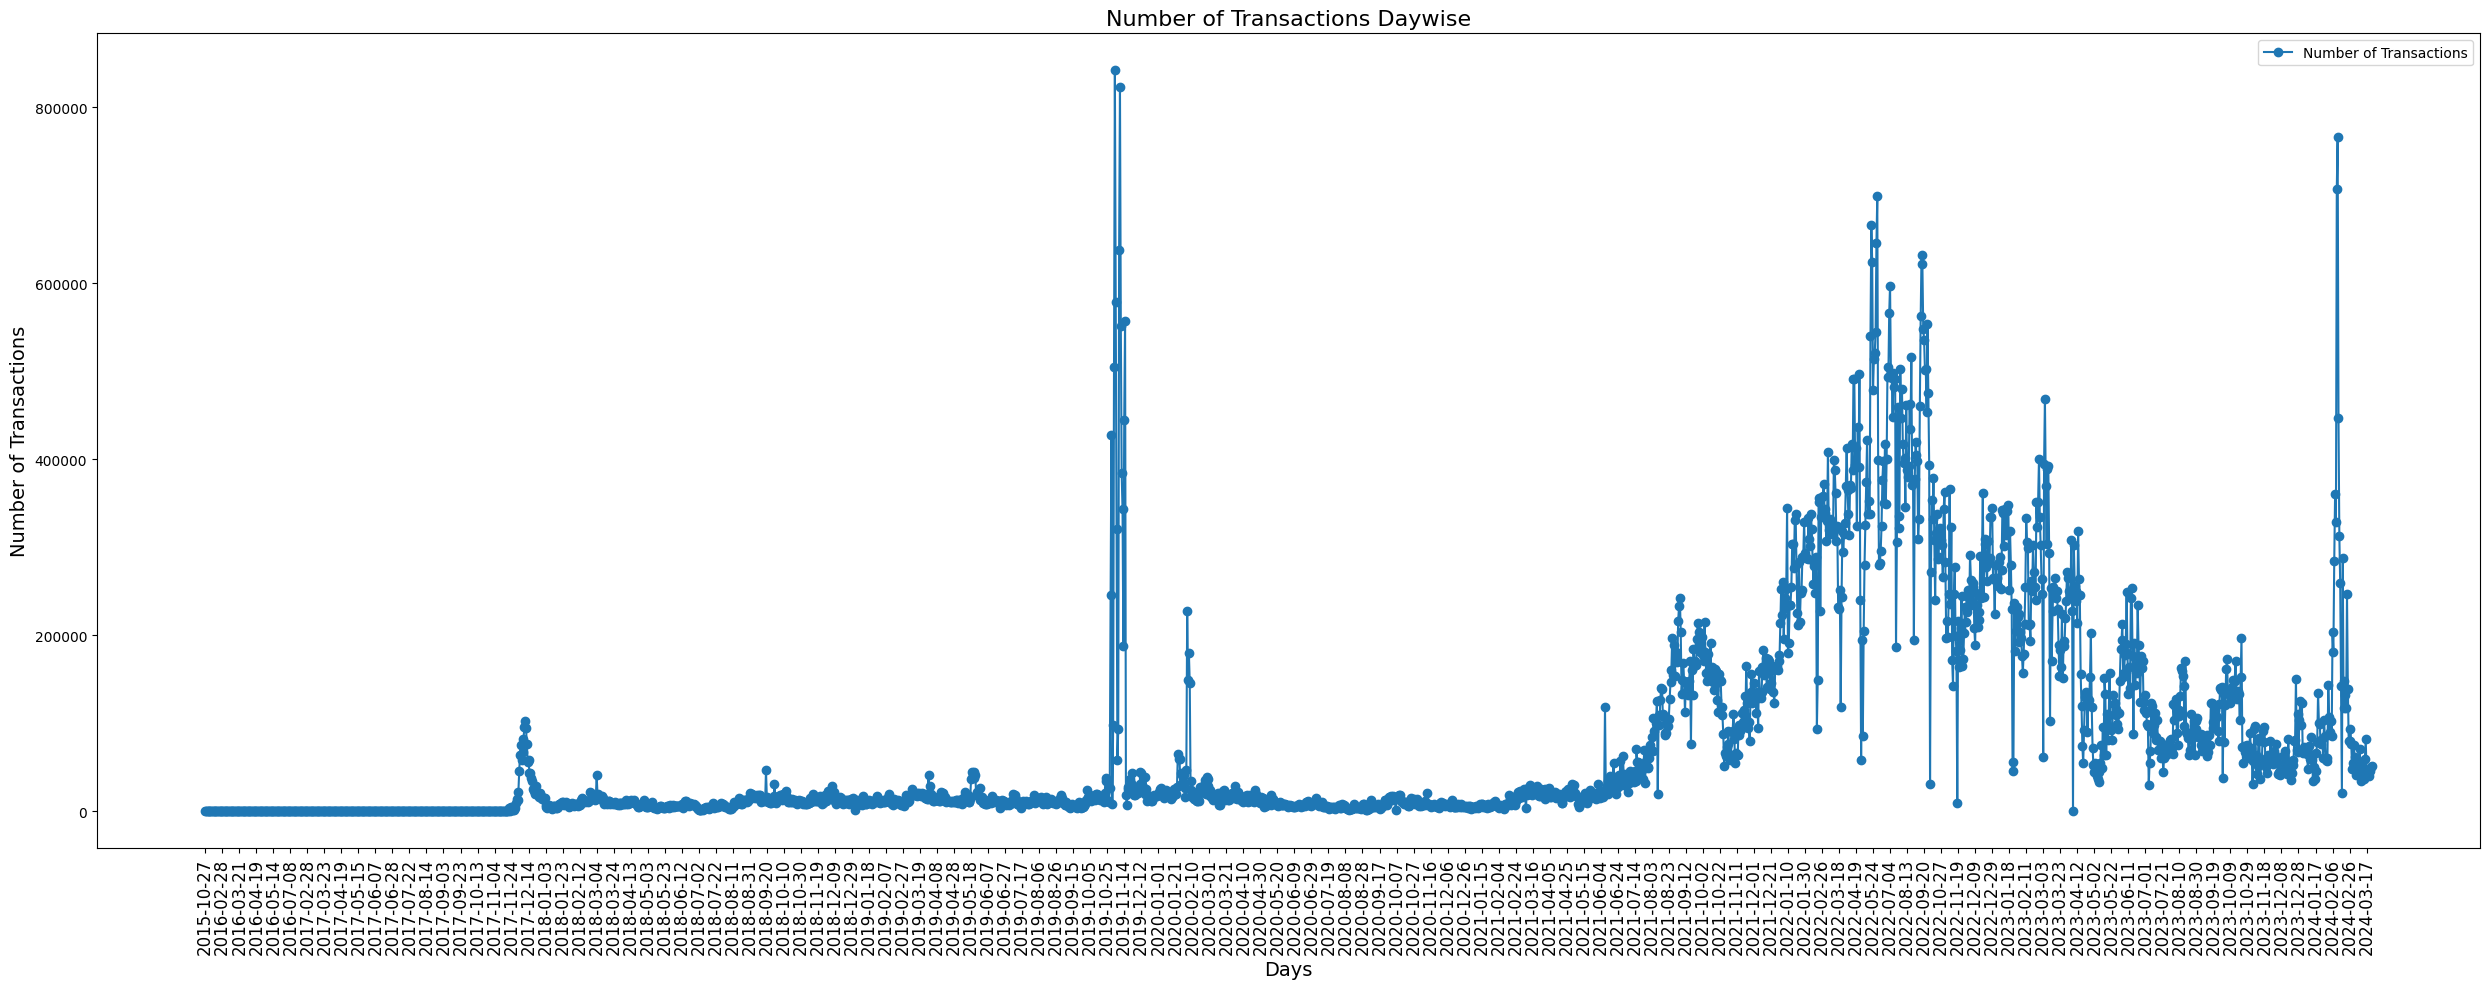

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the path to your CSV file
csv_file_path = r'/home/prio/loc_project/Mini_2_ERC_721/transactions(edges)_day.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Convert the 'Day' column to a datetime format
df['Day'] = pd.to_datetime(df['Day'], format='%Y-%m-%d')

# Extract the 'Day' and 'Number of Transactions' columns
days = df['Day']
num_transactions = df['Number of Transactions']

# Plot the data with improved readability
plt.figure(figsize=(25, 10))  # Increase the figure size for better readability
plt.plot(range(len(days)), num_transactions, marker='o', linestyle='-', color='#1f77b4', label='Number of Transactions')

plt.xlabel('Days', fontsize=14)
plt.ylabel('Number of Transactions', fontsize=14)
plt.title('Number of Transactions Daywise', fontsize=16)

# Selectively label x-axis ticks
selected_indices = list(range(0, len(days), 20))  # Label every 20th day

plt.xticks(
    ticks=selected_indices,  # Set the selected indices
    labels=[days[idx].strftime('%Y-%m-%d') for idx in selected_indices],  # Format the date labels
    fontsize=12,  # Font size for x-tick labels
    rotation=90  # Rotate labels for better readability
)

# Remove grid lines
plt.grid(False)

plt.tight_layout()  # Adjust layout to fit labels

# Add a legend
plt.legend()

# Display the plot
plt.show()


### Edges_Log

Index(['Day', 'Number of Transactions'], dtype='object')
Total Number of Transactions(Edges): 190080636


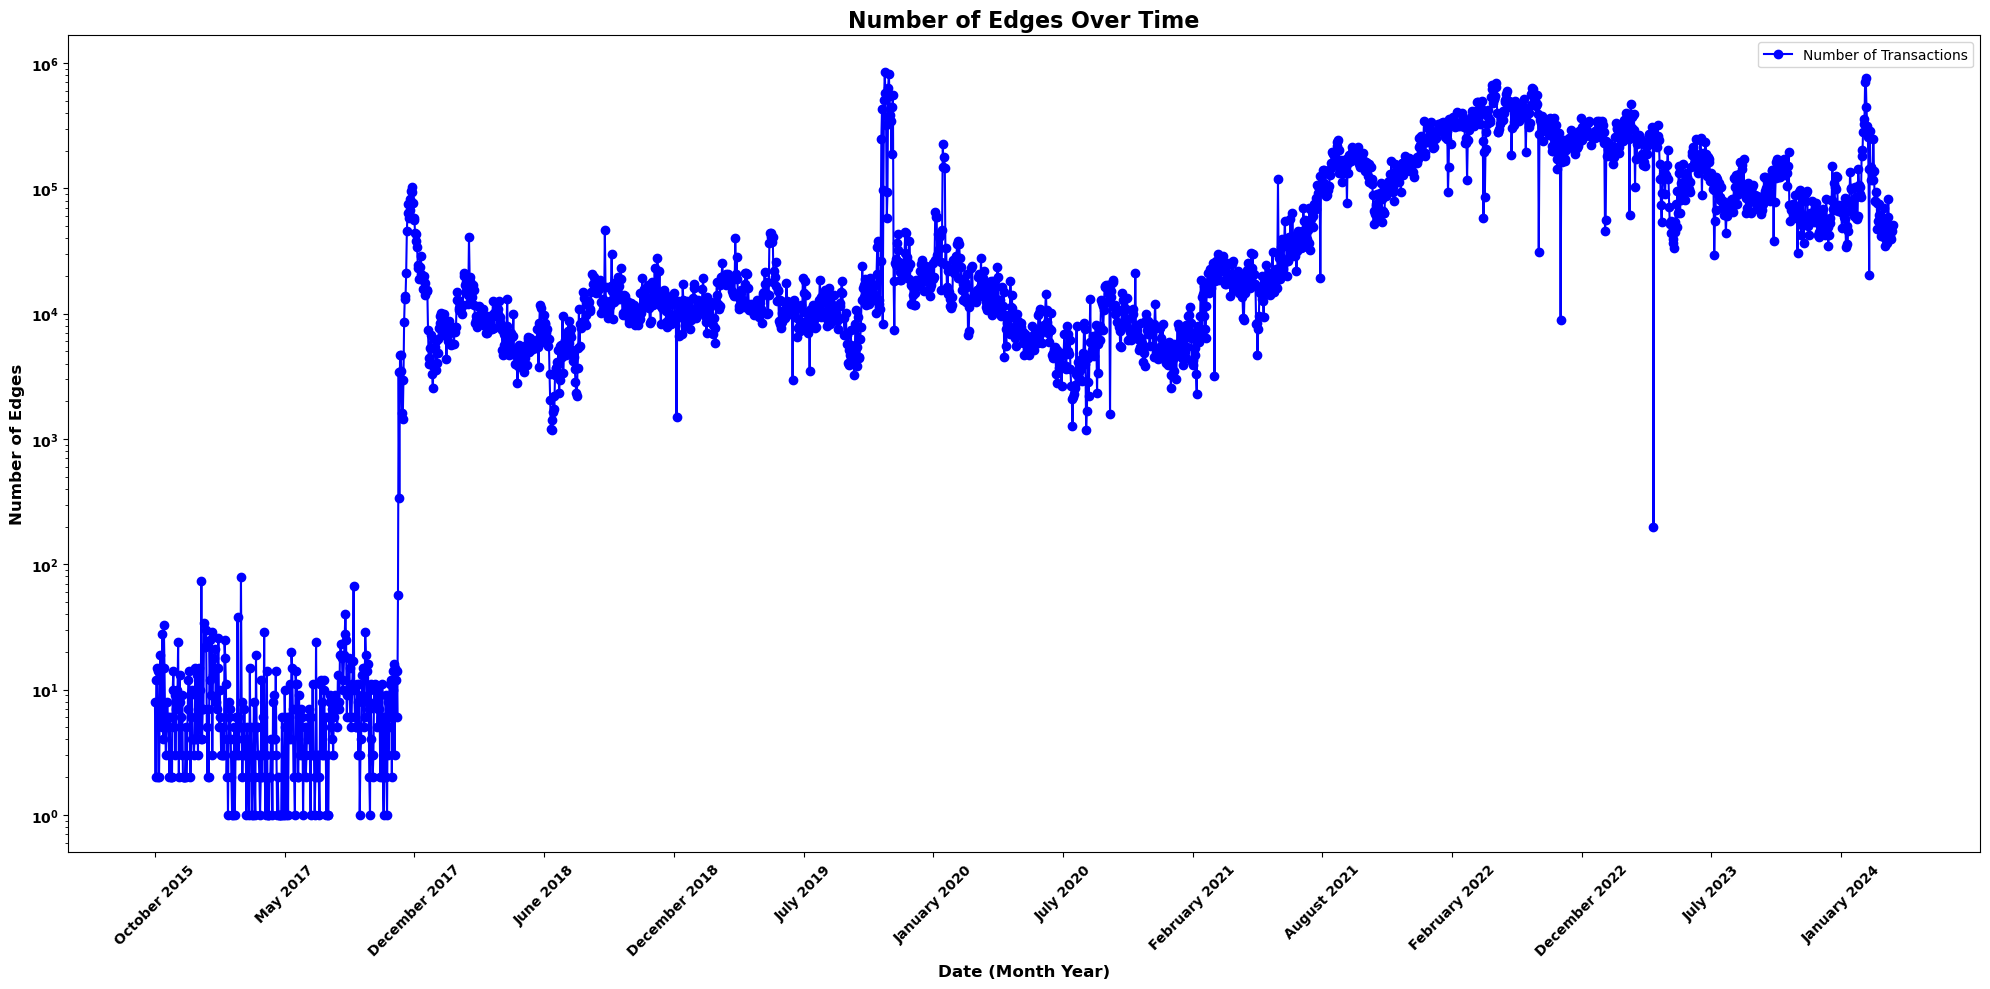

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file
file_path = '/home/prio/loc_project/Mini_2_ERC_721/csv_data/transactions(edges)_day.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Print column names to verify
print(df.columns)

# Assuming the column name is correct
# Replace 'Number of Tranactions' with the correct column name if different
total_edges_column_name = 'Number of Transactions'  # Update this if the column name is different
total_edges = df[total_edges_column_name].sum()
print(f"Total Number of Transactions(Edges): {total_edges}")

# Convert the 'Day' column to datetime format for proper handling
df['Day'] = pd.to_datetime(df['Day'])

# Sort data by the 'Day' column
df.sort_values(by='Day', inplace=True)

# Create a new index based on the number of days since the first date for plotting
days_index = np.arange(len(df))  # Index based on the length of the data

# Plotting the line graph
plt.figure(figsize=(20, 10))  # Set figure size
plt.plot(days_index, df[total_edges_column_name].values, marker='o', linestyle='-', color='b', label='Number of Transactions')

# Set x-axis labels every 190 days
step_size = 190  # Set the step size for x-axis labels
selected_indices = list(range(0, len(df), step_size))  # Select indices spaced by step_size

# Set x-axis ticks and labels with month and year in bold
plt.xticks(
    ticks=selected_indices,
    labels=df['Day'].dt.strftime('%B %Y').iloc[selected_indices],  # Format the date as 'Month Year'
    rotation=45,
    fontsize=10,
    fontweight='bold'  # Set the font to bold
)

plt.yticks(
    fontweight='bold'
)

# Set labels and title
plt.xlabel('Date (Month Year)', fontsize=12, fontweight='bold')
plt.ylabel('Number of Edges', fontsize=12, fontweight='bold')
plt.title('Number of Edges Over Time', fontsize=16, fontweight='bold')

# Set y-axis scale to logarithmic
plt.yscale('log')

# Disable grid
plt.grid(False)

# Add a legend
plt.legend()

# Adjust the layout to avoid label overlap
plt.tight_layout()

# Show the plot
plt.show()


Index(['Day', 'Number of New Edges'], dtype='object')
Total Number of Transactions(Edges): 41486572


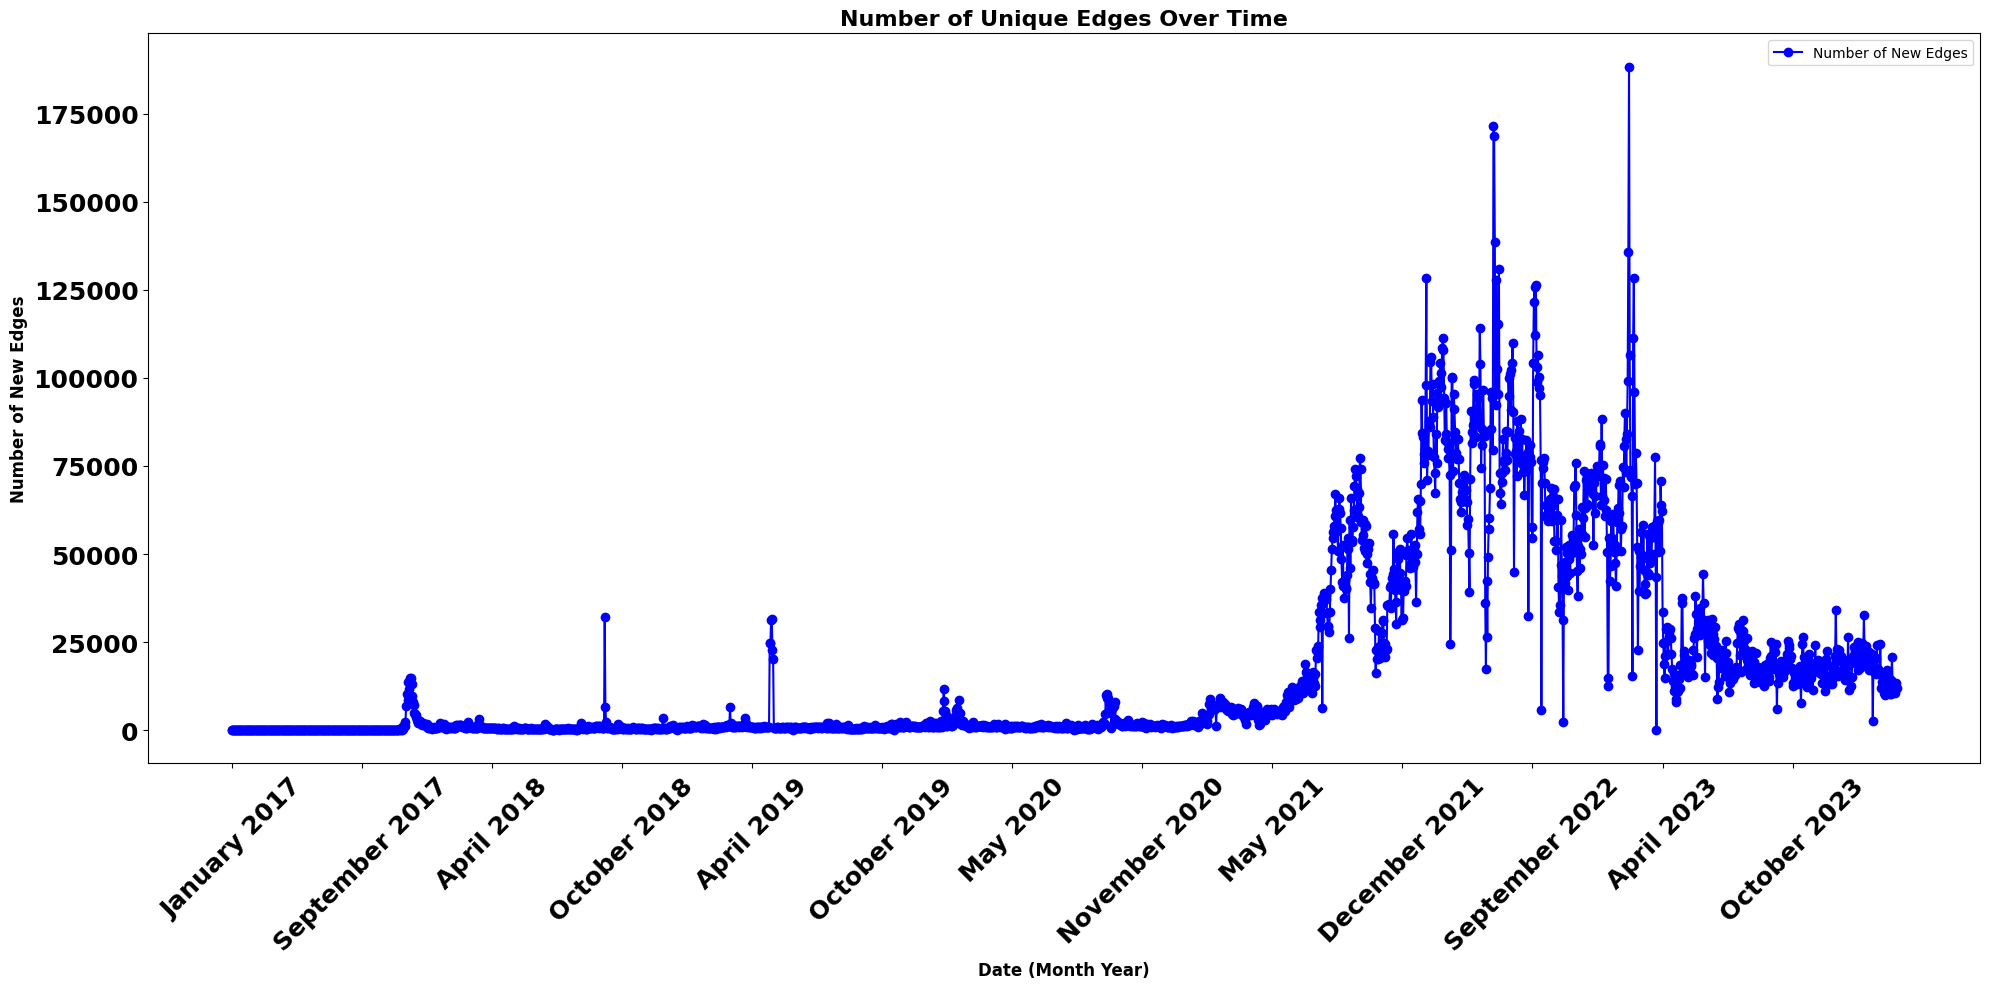

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file
file_path = r'D:\Desktop\SEM 7\MINI_2_2017\new_csv_data_2017\new_edges_normal.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Print column names to verify
print(df.columns)

# Assuming the column name is correct
# Replace 'Number of Tranactions' with the correct column name if different
total_edges_column_name = 'Number of New Edges'  # Update this if the column name is different
total_edges = df[total_edges_column_name].sum()
print(f"Total Number of Transactions(Edges): {total_edges}")

# Convert the 'Day' column to datetime format for proper handling
df['Day'] = pd.to_datetime(df['Day'])

# Sort data by the 'Day' column
df.sort_values(by='Day', inplace=True)

# Create a new index based on the number of days since the first date for plotting
days_index = np.arange(len(df))  # Index based on the length of the data

# Plotting the line graph
plt.figure(figsize=(20, 10))  # Set figure size
plt.plot(days_index, df[total_edges_column_name].values, marker='o', linestyle='-', color='b', label='Number of New Edges')

# Set x-axis labels every 190 days
step_size = 190  # Set the step size for x-axis labels
selected_indices = list(range(0, len(df), step_size))  # Select indices spaced by step_size

# Set x-axis ticks and labels with month and year in bold
plt.xticks(
    ticks=selected_indices,
    labels=df['Day'].dt.strftime('%B %Y').iloc[selected_indices],  # Format the date as 'Month Year'
    rotation=45,
    fontsize=18,
    fontweight='bold'  # Set the font to bold
)

plt.yticks(
    fontweight='bold',
    fontsize=18
)

# Set labels and title
plt.xlabel('Date (Month Year)', fontsize=12, fontweight='bold')
plt.ylabel('Number of New Edges', fontsize=12, fontweight='bold')
plt.title('Number of Unique Edges Over Time', fontsize=16, fontweight='bold')

# Set y-axis scale to logarithmic
# plt.yscale('log')

# Disable grid
plt.grid(False)

# Add a legend
plt.legend()

# Adjust the layout to avoid label overlap
plt.tight_layout()

# Show the plot
plt.show()


### New edges over time daywise

Number of new edges added on
2015-10-27: 4
Progress: 1/2547 files processed
2016-02-01: 2
Progress: 2/2547 files processed
2016-02-04: 5
Progress: 3/2547 files processed
2016-02-09: 6
Progress: 4/2547 files processed
2016-02-11: 5
Progress: 5/2547 files processed
2016-02-12: 0
Progress: 6/2547 files processed
2016-02-13: 1
Progress: 7/2547 files processed
2016-02-14: 3
Progress: 8/2547 files processed
2016-02-15: 5
Progress: 9/2547 files processed
2016-02-16: 1
Progress: 10/2547 files processed
2016-02-17: 2
Progress: 11/2547 files processed
2016-02-18: 7
Progress: 12/2547 files processed
2016-02-19: 0
Progress: 13/2547 files processed
2016-02-20: 7
Progress: 14/2547 files processed
2016-02-21: 5
Progress: 15/2547 files processed
2016-02-22: 4
Progress: 16/2547 files processed
2016-02-23: 1
Progress: 17/2547 files processed
2016-02-25: 0
Progress: 18/2547 files processed
2016-02-26: 2
Progress: 19/2547 files processed
2016-02-27: 1
Progress: 20/2547 files processed
2016-02-28: 1
Progre

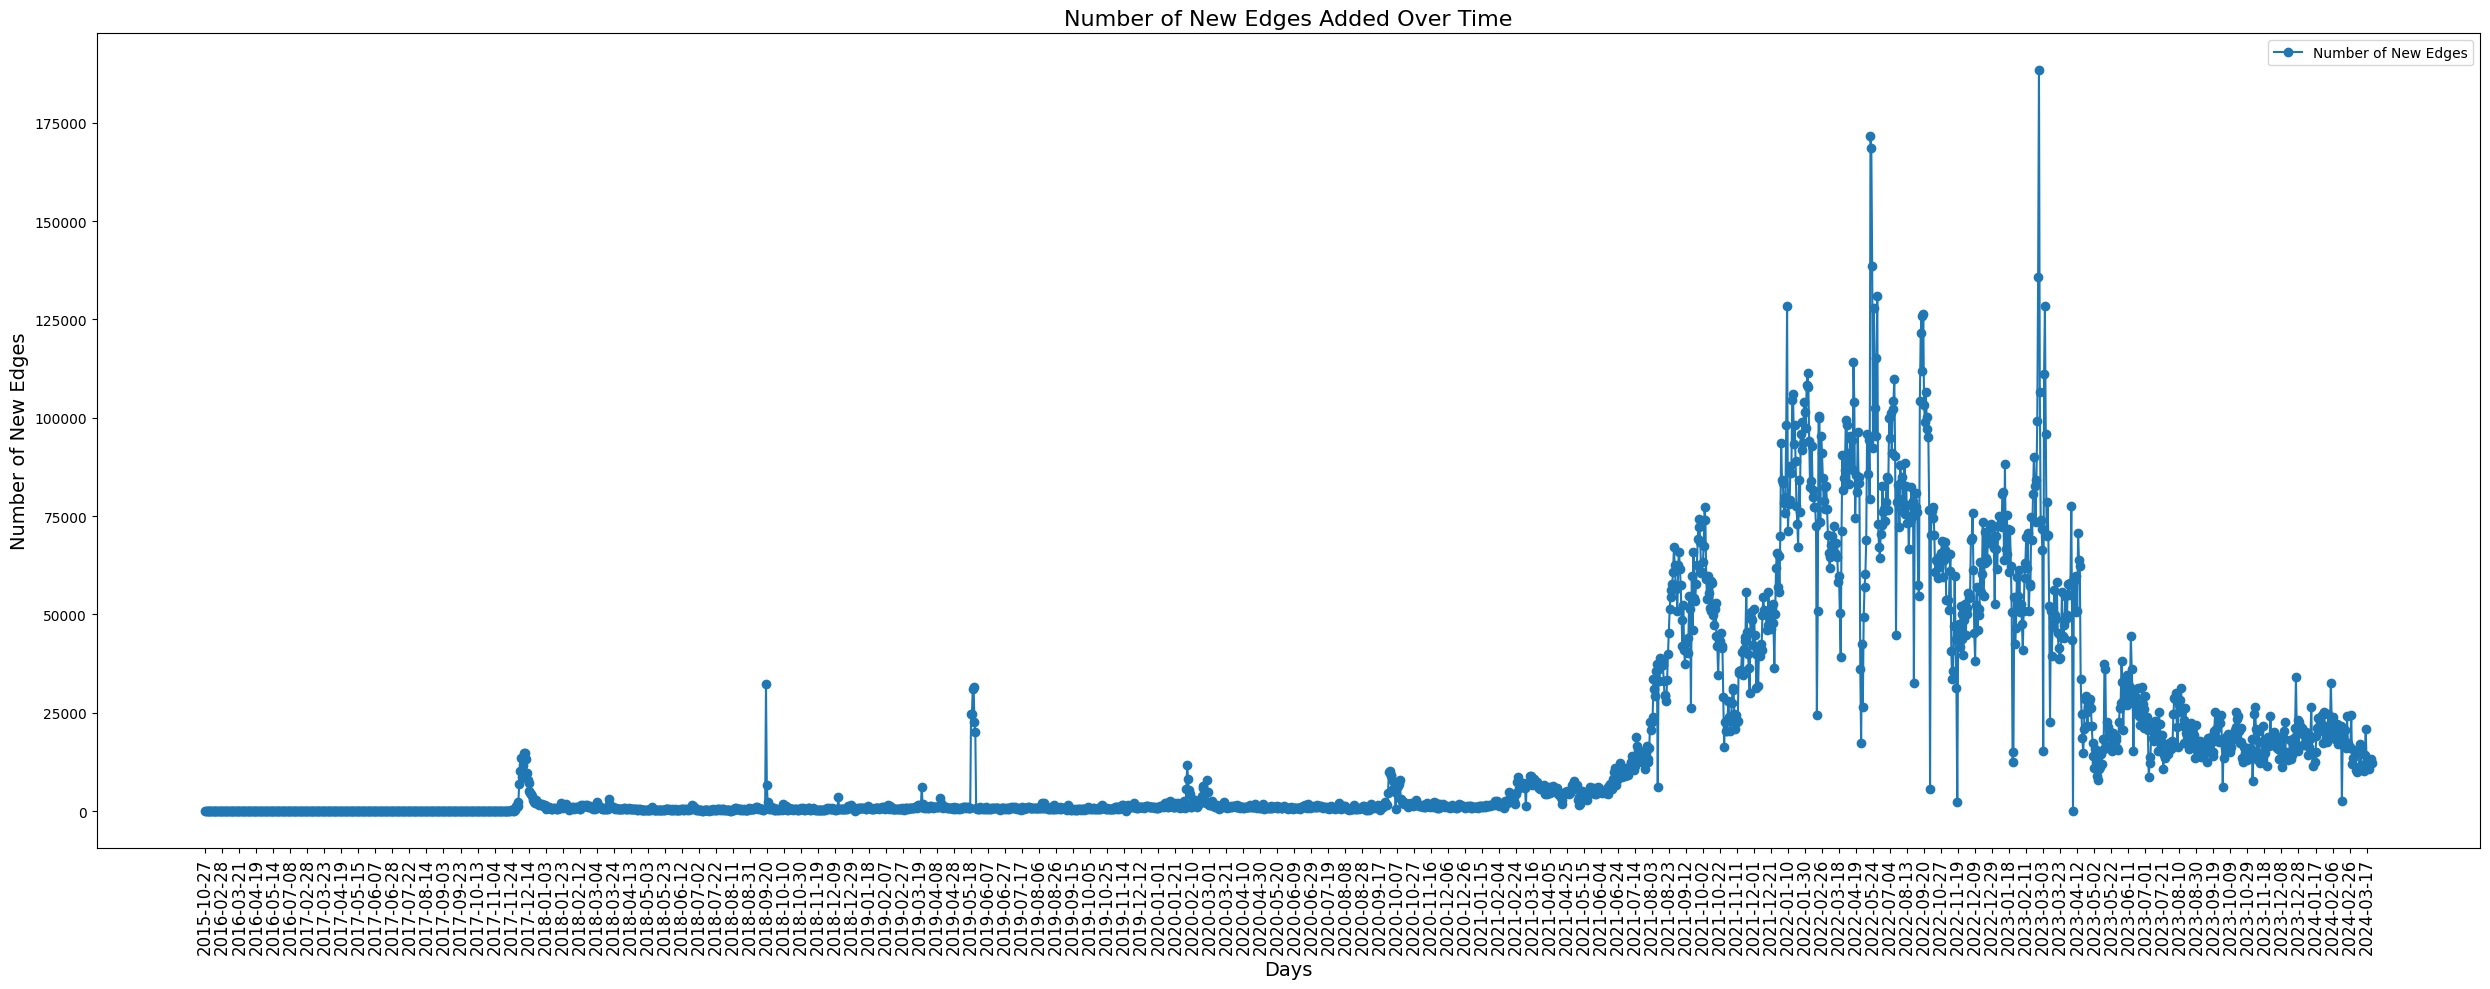

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define the input directory for labeled files
labeled_dir = r'/home/prio/loc_project/Mini_2_ERC_721/labelling_out'

# Initialize a set to store all edges seen so far and a list for new edges per day
all_edges = set()
new_edges_per_day = []

print("Number of new edges added on")

# Process each CSV file in the labeled directory
for i, filename in enumerate(sorted(os.listdir(labeled_dir)), start=1):
    if filename.endswith('.csv'):
        file_path = os.path.join(labeled_dir, filename)
        
        # Read the CSV file
        df = pd.read_csv(file_path)
        
        # Create a set of edges (transactions) for the current day
        current_edges = set(zip(df['fromLabel'], df['toLabel']))
        
        # Calculate the new edges added on this day
        new_edges = current_edges - all_edges
        num_new_edges = len(new_edges)
        day_name = filename.replace('.csv', '')
        new_edges_per_day.append((day_name, num_new_edges))
        
        # Update the set of all edges seen so far
        all_edges.update(new_edges)
        
        # Print the number of new edges for the current day
        print(f"{day_name}: {num_new_edges}")
        
        # Print the progress
        print(f"Progress: {i}/{len(os.listdir(labeled_dir))} files processed")

# Sort the number of new edges by day name
new_edges_per_day.sort()

# Save the data to a CSV file
output_file = r'/home/prio/loc_project/Mini_2_ERC_721/new_edges_normal.csv'
edges_df = pd.DataFrame(new_edges_per_day, columns=['Day', 'Number of New Edges'])
edges_df.to_csv(output_file, index=False)
print(f"Data saved to {output_file}")

# Extract the days and corresponding number of new edges
days = edges_df['Day'].tolist()
num_new_edges = edges_df['Number of New Edges'].tolist()

# Plot the number of new edges over time with improved readability
plt.figure(figsize=(25, 10))  # Increase the figure size for better readability
plt.plot(range(len(days)), num_new_edges, marker='o', linestyle='-', color='#1f77b4', label='Number of New Edges')  # Brighter blue color

plt.xlabel('Days', fontsize=14)
plt.ylabel('Number of New Edges', fontsize=14)
plt.title('Number of New Edges Added Over Time', fontsize=16)

# Selectively label x-axis ticks
selected_indices = list(range(0, len(days), 20))  # Label every 20th day

plt.xticks(
    ticks=selected_indices,  # Set the selected indices
    labels=[days[idx] for idx in selected_indices],  # Set corresponding day names as labels
    fontsize=12,  # Font size for x-tick labels
    rotation=90  # Rotate labels for better readability
)

plt.tight_layout()  # Adjust layout to fit labels

# Optional: Add grid lines for better readability
plt.grid(False)

# Add a legend
plt.legend()

# Display the plot
plt.show()


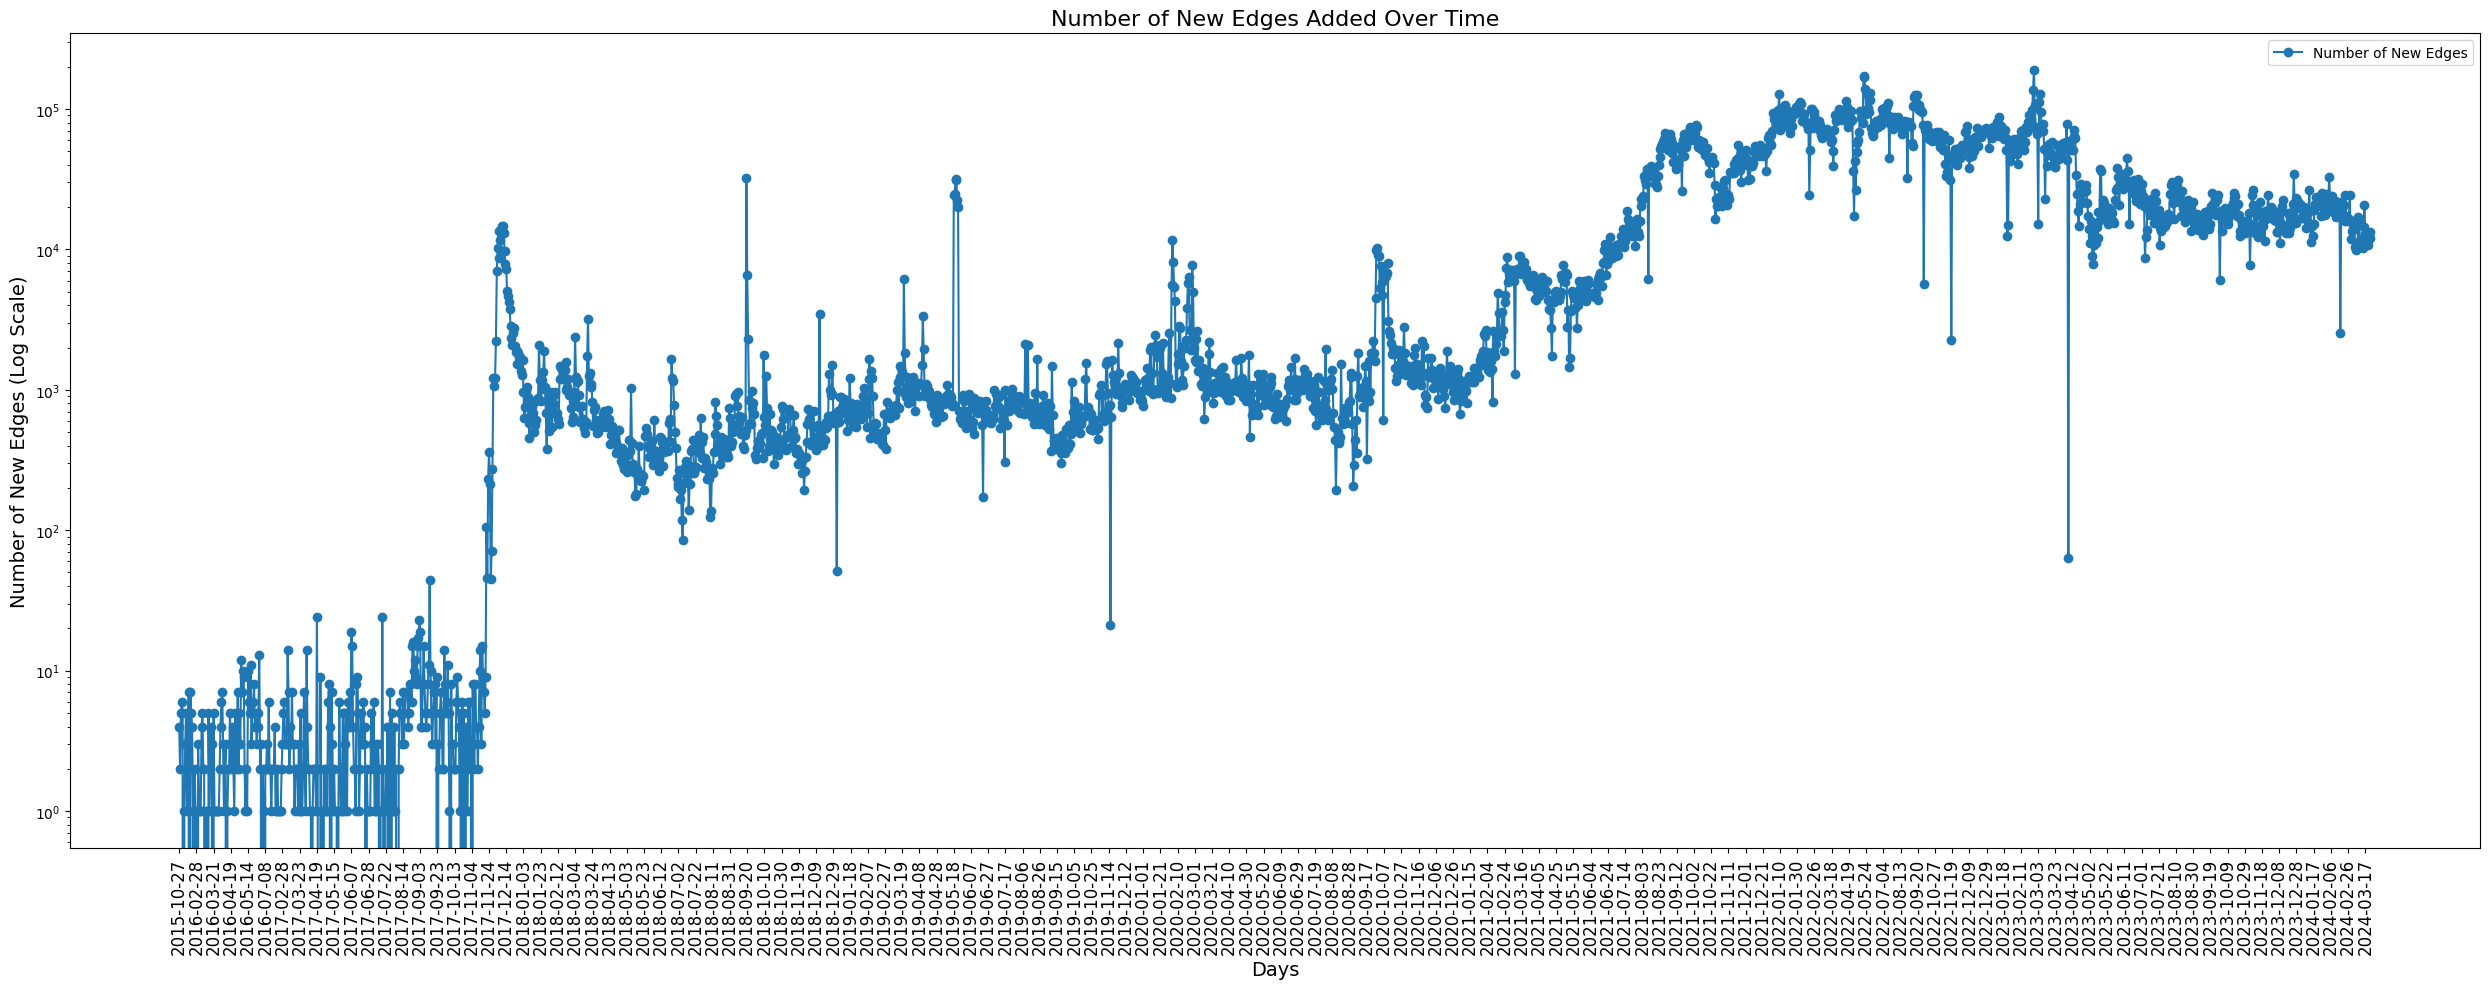

In [7]:
import matplotlib.pyplot as plt

# Assuming 'days' and 'num_new_edges' are already defined

plt.figure(figsize=(25, 10))  # Increase the figure size for better readability
plt.plot(range(len(days)), num_new_edges, marker='o', linestyle='-', color='#1f77b4', label='Number of New Edges')  # Brighter blue color

plt.xlabel('Days', fontsize=14)
plt.ylabel('Number of New Edges (Log Scale)', fontsize=14)  # Updated ylabel to reflect log scale
plt.title('Number of New Edges Added Over Time', fontsize=16)  # Updated title

# Set y-axis to a logarithmic scale
plt.yscale('log')

# Selectively label x-axis ticks
selected_indices = list(range(0, len(days), 20))  # Label every 20th day

plt.xticks(
    ticks=selected_indices,  # Set the selected indices
    labels=[days[idx] for idx in selected_indices],  # Set corresponding day names as labels
    fontsize=12,  # Font size for x-tick labels
    rotation=90  # Rotate labels for better readability
)

plt.tight_layout()  # Adjust layout to fit labels

# Optional: Add grid lines for better readability
plt.grid(False)

# Add a legend
plt.legend()

# Display the plot
plt.show()


Number if edges and
Number of new edges formed are
2015-10-27: 8, 4
2016-02-01: 2, 2
2016-02-04: 12, 5
2016-02-09: 15, 6
2016-02-11: 14, 5
2016-02-12: 2, 0
2016-02-13: 2, 1
2016-02-14: 6, 3
2016-02-15: 19, 5
2016-02-16: 7, 1
2016-02-17: 5, 2
2016-02-18: 28, 7
2016-02-19: 4, 0
2016-02-20: 33, 7
2016-02-21: 15, 5
2016-02-22: 5, 4
2016-02-23: 3, 1
2016-02-25: 5, 0
2016-02-26: 8, 2
2016-02-27: 6, 1
2016-02-28: 5, 1
2016-02-29: 2, 0
2016-03-01: 6, 3
2016-03-02: 2, 1
2016-03-03: 2, 1
2016-03-04: 2, 1
2016-03-05: 10, 4
2016-03-07: 14, 5
2016-03-08: 5, 2
2016-03-09: 9, 2
2016-03-10: 3, 0
2016-03-11: 7, 1
2016-03-12: 10, 1
2016-03-13: 9, 0
2016-03-15: 24, 5
2016-03-16: 2, 1
2016-03-17: 13, 2
2016-03-18: 8, 4
2016-03-19: 6, 3
2016-03-20: 3, 0
2016-03-21: 9, 5
2016-03-22: 2, 1
2016-03-23: 2, 1
2016-03-24: 2, 1
2016-03-26: 2, 1
2016-03-27: 5, 1
2016-03-28: 2, 1
2016-03-29: 3, 2
2016-03-30: 7, 4
2016-04-01: 12, 6
2016-04-02: 14, 7
2016-04-03: 9, 3
2016-04-04: 2, 1
2016-04-06: 6, 2
2016-04-07: 10, 3

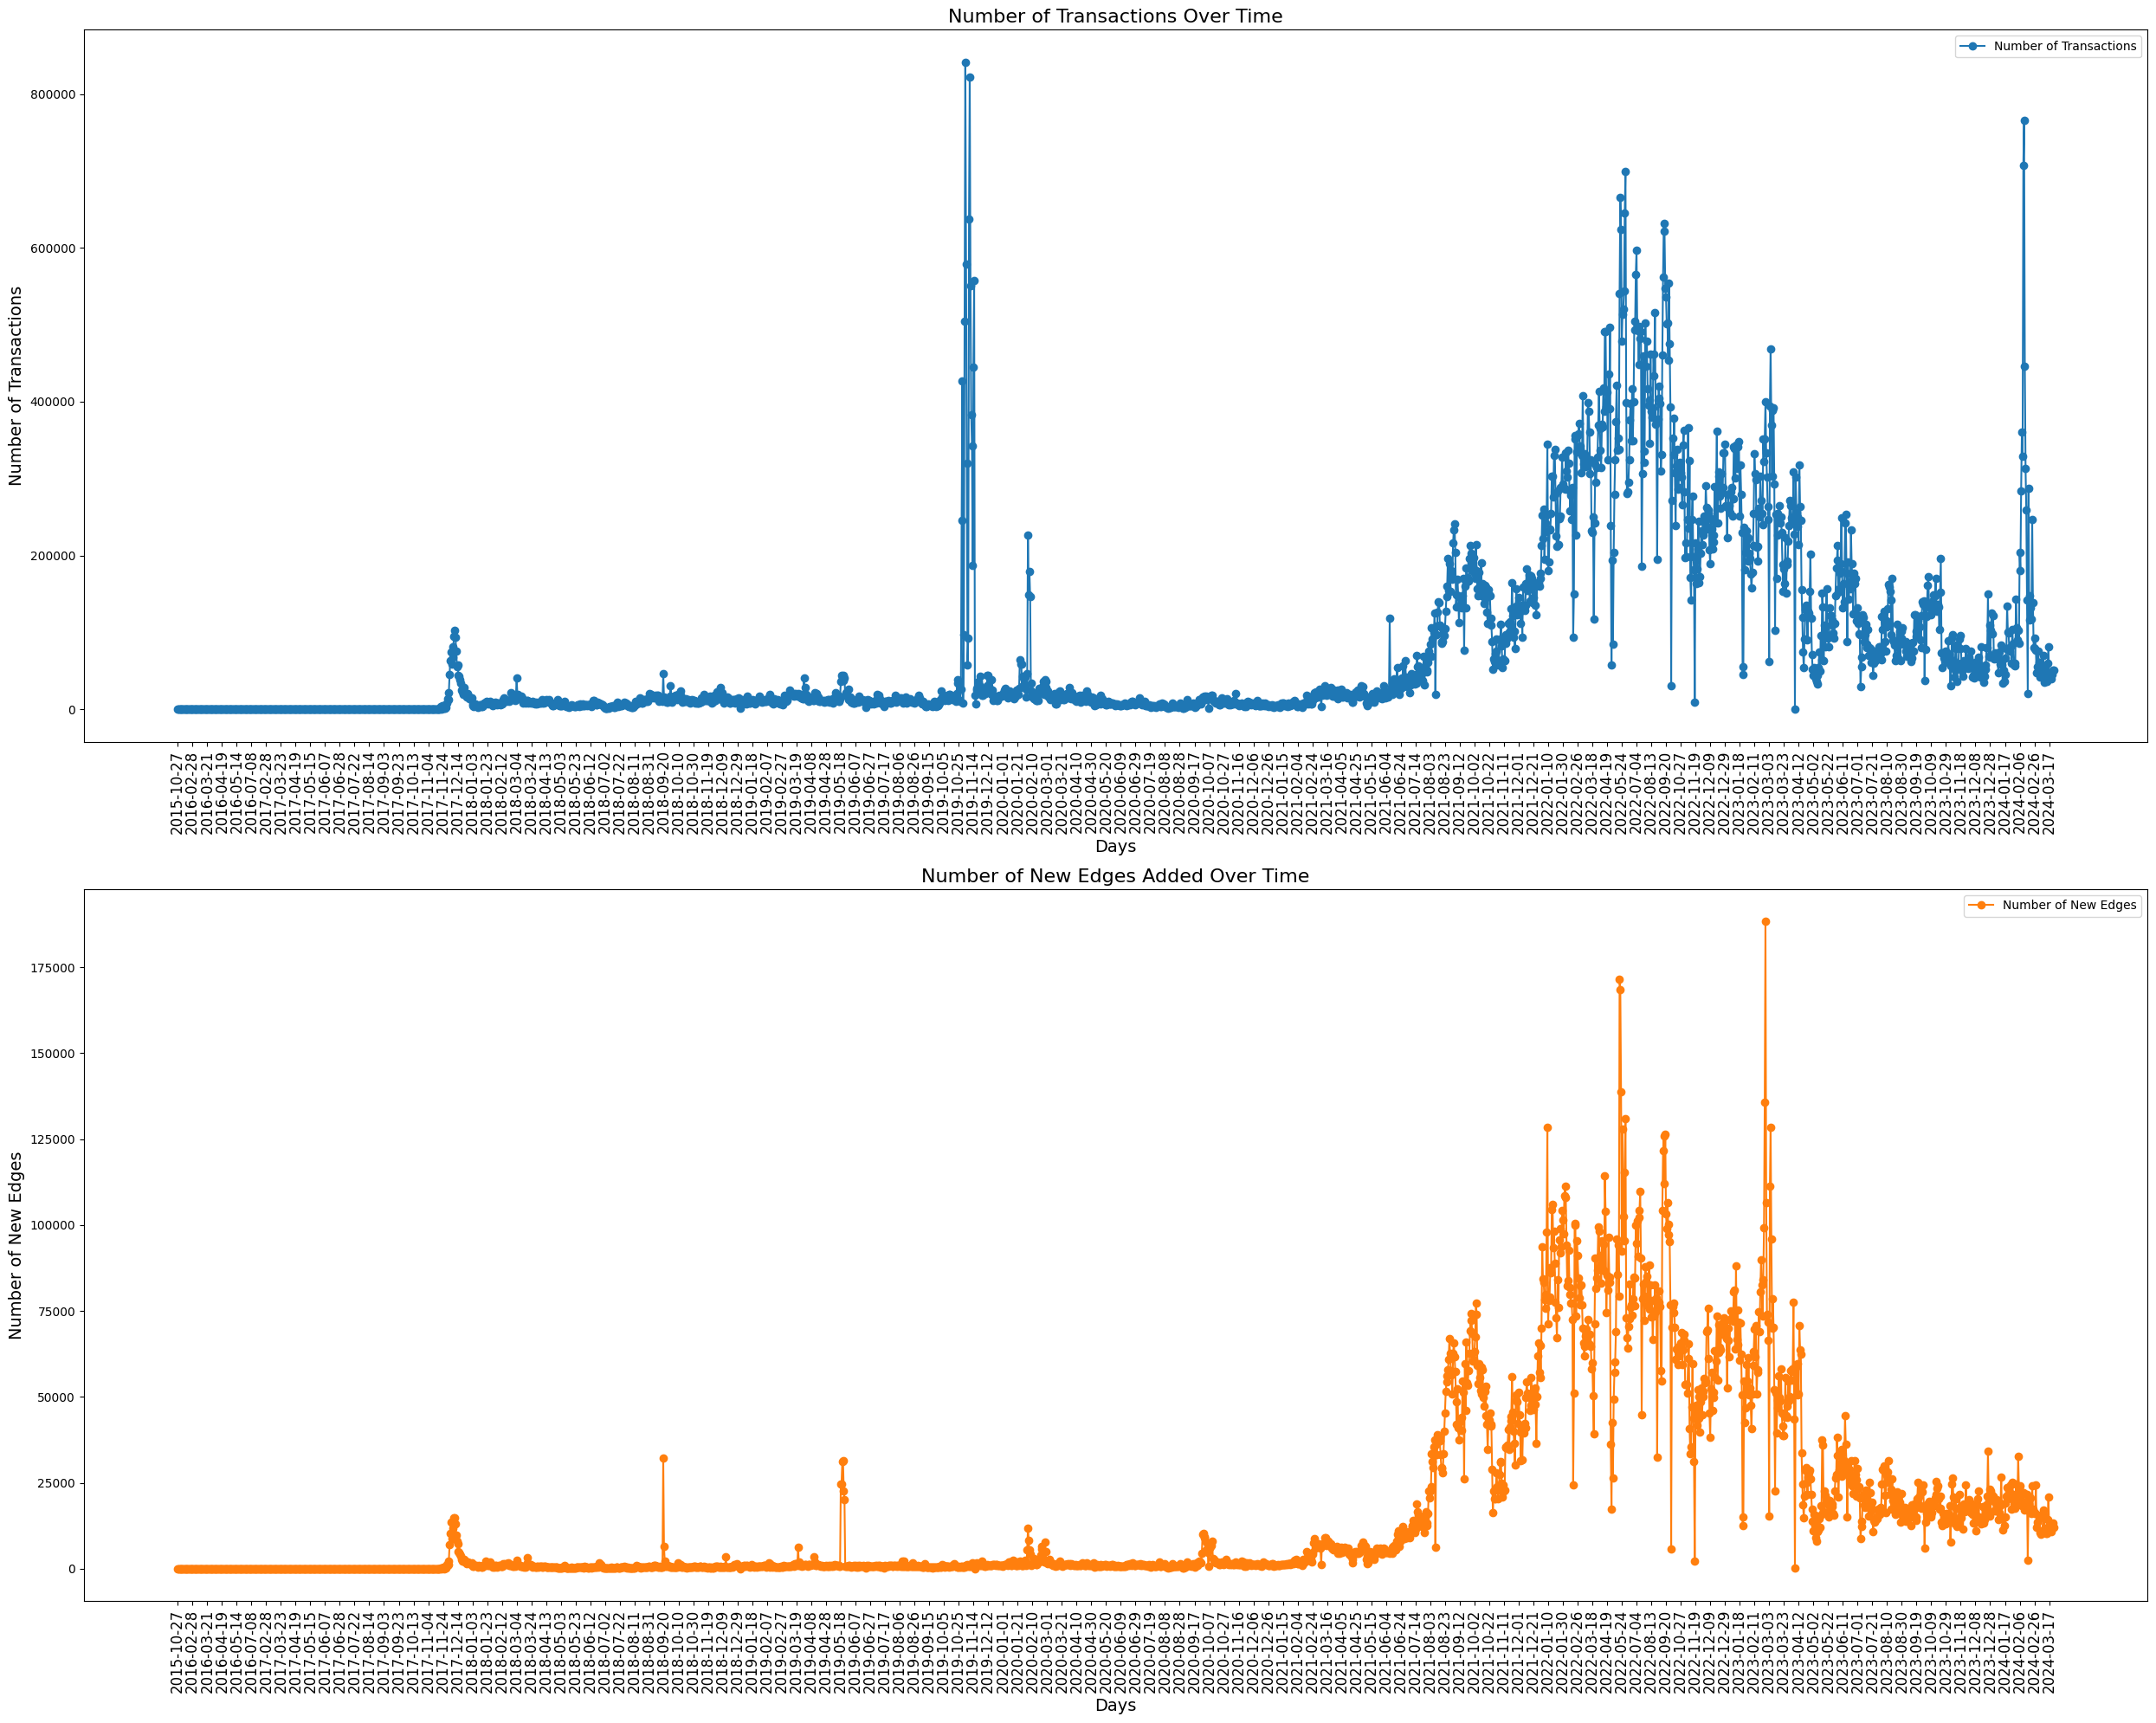

In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define the input directory for labeled files
labeled_dir = r'/home/prio/loc_project/Mini_2_ERC_721/labelling_out'

# Initialize lists to store data
num_transactions_per_day = []
all_edges = set()
new_edges_per_day = []


print("Number if edges and")
print("Number of new edges formed are")

# Process each CSV file in the labeled directory
for filename in sorted(os.listdir(labeled_dir)):
    if filename.endswith('.csv'):
        file_path = os.path.join(labeled_dir, filename)
        
        # Read the CSV file
        df = pd.read_csv(file_path)
        
        # Calculate number of transactions
        num_transactions = len(df)
        day_name = filename.replace('.csv', '')
        num_transactions_per_day.append((day_name, num_transactions))
        
        # Calculate number of new edges
        current_edges = set(zip(df['fromLabel'], df['toLabel']))
        new_edges = current_edges - all_edges
        num_new_edges = len(new_edges)
        new_edges_per_day.append((day_name, num_new_edges))
        all_edges.update(new_edges)
        
        # Print results
        print(f"{day_name}: {num_transactions}, {num_new_edges}")

# Sort the data by day name
num_transactions_per_day.sort()
new_edges_per_day.sort()

# Extract days and corresponding numbers
days = [day for day, _ in num_transactions_per_day]
num_transactions = [transactions for _, transactions in num_transactions_per_day]
num_new_edges = [edges for _, edges in new_edges_per_day]

# Create a new figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(25, 20))  # Two rows, one column

# Plot Number of Transactions on the first subplot
ax1.plot(range(len(days)), num_transactions, marker='o', linestyle='-', color='#1f77b4', label='Number of Transactions')  # Brighter blue color
ax1.set_xlabel('Days', fontsize=14)
ax1.set_ylabel('Number of Transactions', fontsize=14)
ax1.set_title('Number of Transactions Over Time', fontsize=16)


# Set x-axis ticks for the first subplot
selected_indices = list(range(0, len(days), 20))  # Label every 20th day
ax1.set_xticks(selected_indices)
ax1.set_xticklabels([days[idx] for idx in selected_indices], fontsize=12, rotation=90)  # Rotate labels for better readability

# Optional: Add grid lines for better readability
ax1.grid(False)

# Add legend for the first subplot
ax1.legend()

# Plot Number of New Edges on the second subplot
ax2.plot(range(len(days)), num_new_edges, marker='o', linestyle='-', color='#ff7f0e', label='Number of New Edges')  # Orange color
ax2.set_xlabel('Days', fontsize=14)
ax2.set_ylabel('Number of New Edges', fontsize=14)
ax2.set_title('Number of New Edges Added Over Time', fontsize=16)



# Set x-axis ticks for the second subplot
ax2.set_xticks(selected_indices)
ax2.set_xticklabels([days[idx] for idx in selected_indices], fontsize=12, rotation=90)  # Rotate labels for better readability

# Optional: Add grid lines for better readability
ax2.grid(False)

# Add legend for the second subplot
ax2.legend()

# Adjust layout to fit labels
plt.tight_layout()

# Display the plot
plt.show()
